- Open anaconda prompt
- pip install mglearn
- pip install graphviz
- Copy the path of graphviz folder.
- For WINDOWS, 
add it to the user PATH and system PATH variable.
- For Linux/Mac, 
setenv GRAPHVIZ_DOT /usr/local/bin/graphviz/dot export GRAPHVIZ_DOT

In [ ]:
# Decision trees are widely used models for classification and regression tasks. 
# Essentially,they learn a hierarchy of if/else questions, leading to a decision.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import mglearn

In [2]:
from IPython.core.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [6]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [4]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Here we set max_depth=4, meaning only four consecutive questions can be asked. 
Limiting the depth of the tree decreases overfitting.

In [5]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.
We set an option to color the nodes to reflect the majority class in each node and pass
the class and features names so the tree can be properly labeled:

In [6]:
from sklearn.tree import export_graphviz

In [7]:
export_graphviz(tree, out_file = "tree.dot", class_names = ["malignant", "benign"],
feature_names = cancer.feature_names, impurity = False, filled = True)

In [8]:
import graphviz

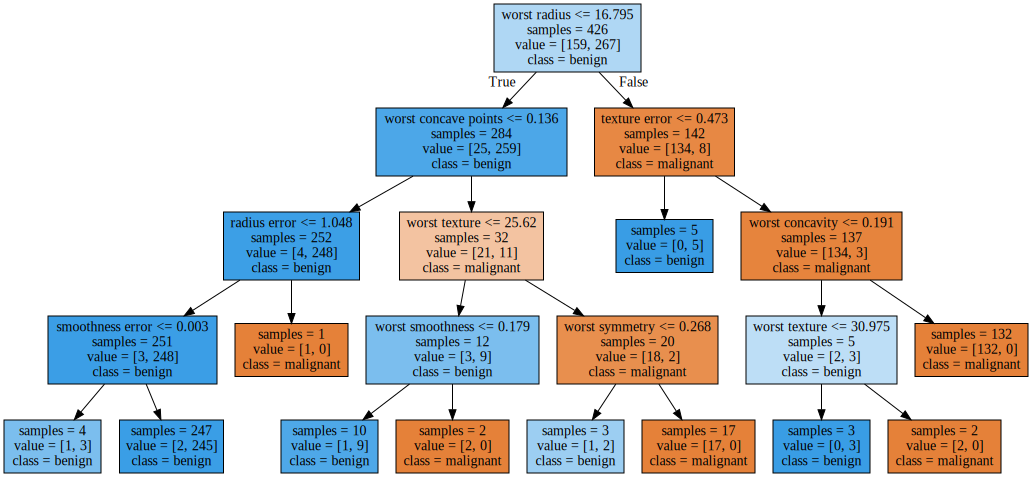

In [9]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

"feature importance" rates how important each feature is for the decision a tree makes. 
It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means 
“perfectly predicts the target.” 
The feature importances always sum to 1:

In [10]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [18]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

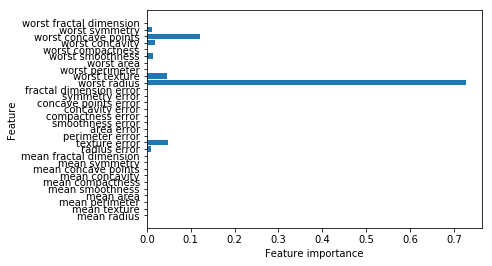

In [19]:
plot_feature_importances_cancer(tree)

There might not be such a simple relationship between features and class.

Feature importances: [0. 1.]


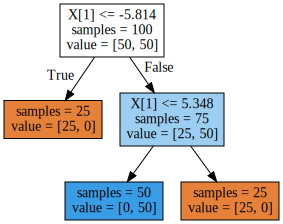

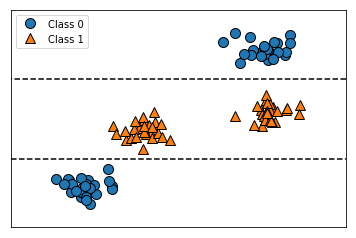

In [22]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Here, all the information is contained in X[1], and X[0] is not used at all. 
But the relation between X[1] and the output class is not monotonous, 
meaning we cannot say “a high value of X[0] means class 0, and a low value means class 1”.